In [1]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")
Using TensorFlow backend.


In [2]:
data = pd.read_csv('../../SignLanguage/sign_mnist_train/sign_mnist_train.csv')
testData = pd.read_csv('../../SignLanguage/sign_mnist_test/sign_mnist_test.csv')

In [3]:
data.shape
testData.shape

(7172, 785)

In [4]:
Features = data.drop('label', axis=1)
Label = data.label
Feature_test = testData.drop('label', axis=1)
Label_test = testData.label

In [5]:
print(Features.shape)
print(Label.shape)
print(Feature_test.shape)
print(Label_test.shape)

(27455, 784)
(27455,)
(7172, 784)
(7172,)


In [6]:
#X_train,X_test,y_train,y_test = train_test_split(Features,Label,test_size=0.33,random_state=42)
#y_train.max()
X_train = Features
X_test = Feature_test
y_train = Label
y_test = Label_test

In [7]:
X_train_scaled = X_train/X_train.max()
X_test_scaled = X_test/X_train.max()
y_cat_train = to_categorical(y_train,26)
y_cat_test = to_categorical(y_test,26)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Activation,MaxPool2D,Dropout

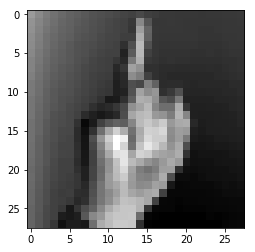

In [9]:
X_train_scaled.shape
#X_train_scaled = X_train_scaled.reshape(18394,28,28)
X_train_scaled_input = X_train_scaled.values
X_train_scaled_input = X_train_scaled_input.reshape(27455,28,28)
plt.imshow(X_train_scaled_input[0],cmap='gray_r')
X_train_scaled_input = X_train_scaled_input.reshape(27455,28,28,1)
X_test_scaled_input = X_test_scaled.values
X_test_scaled_input = X_test_scaled_input.reshape(7172,28,28,1)

In [121]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(26,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [122]:
model.fit(X_train_scaled_input,y_cat_train,epochs=5,batch_size=15)

Epoch 1/5
27455/27455 [==============================] - 80s 3ms/step - loss: 1.2281 - acc: 0.6115
Epoch 2/5
27455/27455 [==============================] - 48s 2ms/step - loss: 0.1993 - acc: 0.9337
Epoch 3/5
27455/27455 [==============================] - 50s 2ms/step - loss: 0.0967 - acc: 0.9690
Epoch 4/5
27455/27455 [==============================] - 55s 2ms/step - loss: 0.0594 - acc: 0.9805: 0s - loss: 0.0592 - a
Epoch 5/5
27455/27455 [==============================] - 50s 2ms/step - loss: 0.0475 - acc: 0.9858: 0s - loss: 0.0476


In [123]:
model.evaluate(X_test_scaled_input,y_cat_test)

7172/7172 [==============================] - 5s 718us/step


[0.36322107298084727, 0.9411600669269381]

In [124]:
predictions = model.predict_classes(X_test_scaled_input)

In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.89      1.00      0.94       331
          1       1.00      0.93      0.96       432
          2       1.00      1.00      1.00       310
          3       0.92      1.00      0.96       245
          4       0.94      0.94      0.94       498
          5       1.00      1.00      1.00       247
          6       0.88      0.94      0.91       348
          7       0.95      0.92      0.93       436
          8       0.92      0.85      0.89       288
         10       0.99      1.00      0.99       331
         11       1.00      1.00      1.00       209
         12       0.95      0.85      0.90       394
         13       1.00      0.65      0.78       291
         14       1.00      1.00      1.00       246
         15       1.00      1.00      1.00       347
         16       0.96      1.00      0.98       164
         17       1.00      0.85      0.92       144
         18       0.81      0.97      0.88   

In [126]:
model.save('../Models/signLanguagePredictor.h5')